Global minimum found at: [0. 0.]
Function value at the global minimum: 0.0


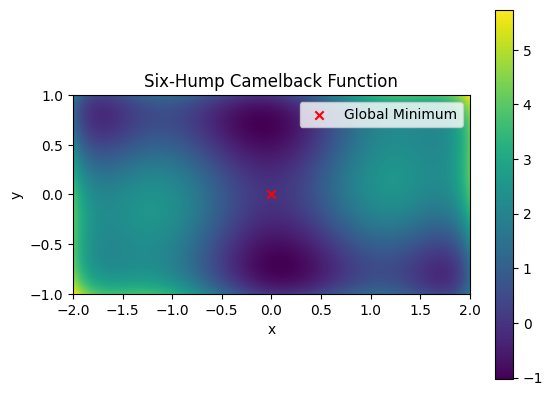

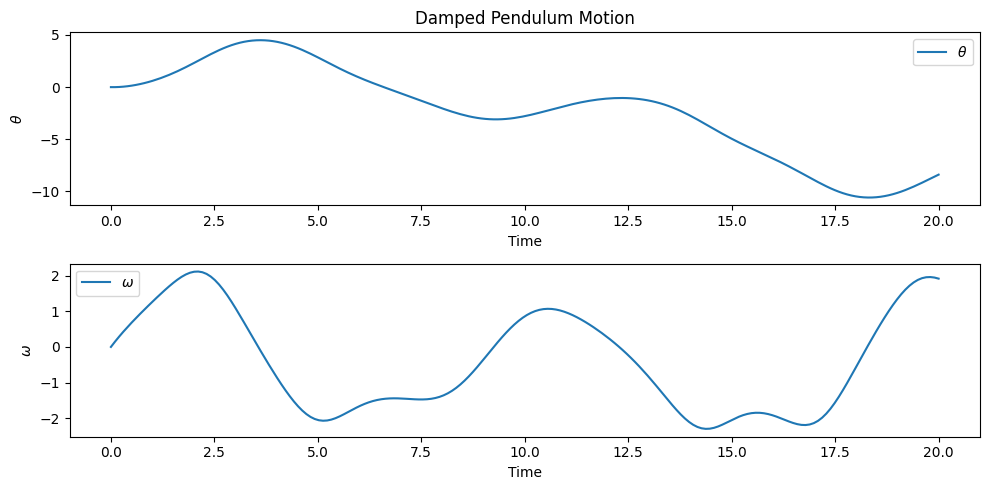

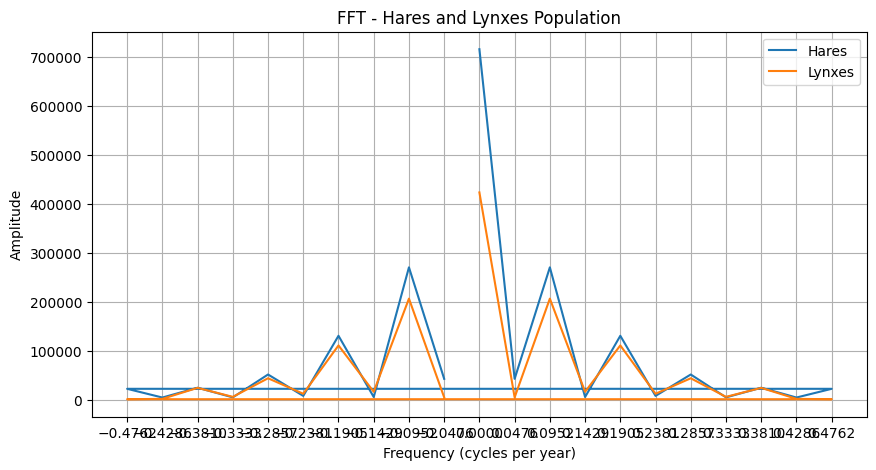

Period of Hares population: inf years
Period of Lynxes population: inf years


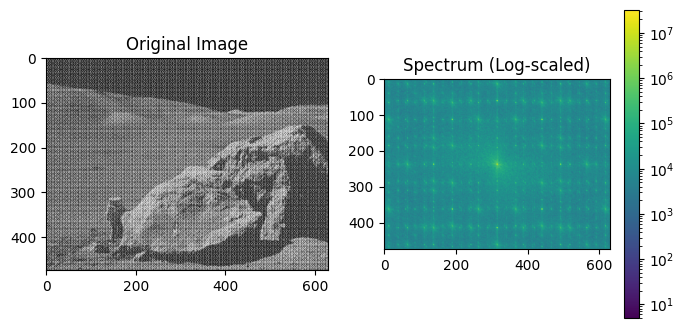

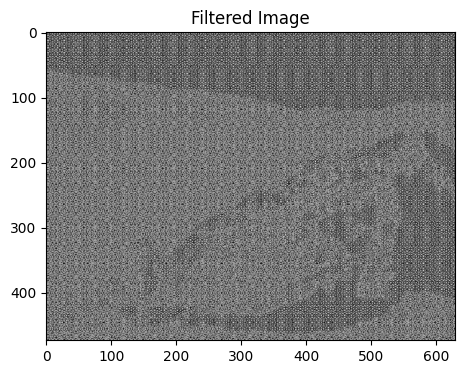

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio  # Use imageio.v2 to avoid the deprecation warning
from scipy.fft import fft2, ifft2, fftshift
from matplotlib.colors import LogNorm
from scipy.optimize import minimize


# 1. 2D minimization of a six-hump camelback function

def camelback_function(x):
    return (4 - 2.1 * x[0]**2 + (x[0]**4)/3) * x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4) * x[1]**2
constraints = (
    {'type': 'ineq', 'fun': lambda x: 2 - x[0]},  # x <= 2
    {'type': 'ineq', 'fun': lambda x: x[0] + 2},  # x >= -2
    {'type': 'ineq', 'fun': lambda x: 1 - x[1]},  # y <= 1
    {'type': 'ineq', 'fun': lambda x: x[1] + 1}   # y >= -1
)
initial_guess = [0, 0]
result = minimize(camelback_function, initial_guess, constraints=constraints)

# Print the results
print("Global minimum found at:", result.x)
print("Function value at the global minimum:", result.fun)
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = camelback_function([X, Y])

plt.imshow(Z, extent=[-2, 2, -1, 1], origin='lower', cmap='viridis')
plt.colorbar()
plt.title("Six-Hump Camelback Function")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(result.x[0], result.x[1], c='red', marker='x', label='Global Minimum')
plt.legend()
plt.show()


# 2. Non-linear ODE: the damped pendulum
def derivatives(theta, omega, t, Q, g, l, d, Omega):
    dtheta_dt = omega
    domega_dt = -1/Q * omega + (g/l) * np.sin(theta) + d * np.cos(Omega * t)
    return dtheta_dt, domega_dt

l = 10.0  
Q = 2.0 
d = 1.5 
g = 9.81
Omega = 0.65 

theta_0 = 0.0
omega_0 = 0.0

dt = 0.1
t_max = 20.0
num_steps = int(t_max / dt)

theta_values = np.zeros(num_steps)
omega_values = np.zeros(num_steps)
time_values = np.linspace(0, t_max, num_steps)

theta_values[0] = theta_0
omega_values[0] = omega_0

for i in range(1, num_steps):
    dtheta_dt, domega_dt = derivatives(theta_values[i-1], omega_values[i-1], time_values[i-1], Q, g, l, d, Omega)
    theta_values[i] = theta_values[i-1] + dt * dtheta_dt
    omega_values[i] = omega_values[i-1] + dt * domega_dt

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time_values, theta_values, label=r'$\theta$')
plt.title('Damped Pendulum Motion')
plt.xlabel('Time')
plt.ylabel(r'$\theta$')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_values, omega_values, label=r'$\omega$')
plt.xlabel('Time')
plt.ylabel(r'$\omega$')
plt.legend()

plt.tight_layout()
plt.show()


# 3. FFT of a simple dataset
file_path = './data/populations.txt'
populations = np.loadtxt(file_path, skiprows=1)
time = populations[:, 0]
hares = populations[:, 1]
lynxes = populations[:, 2]

fft_hares = np.fft.fft(hares)
fft_lynxes = np.fft.fft(lynxes)

frequency = np.fft.fftfreq(len(time), time[1] - time[0])

plt.figure(figsize=(10, 5))
plt.plot(frequency, np.abs(fft_hares), label='Hares')
plt.plot(frequency, np.abs(fft_lynxes), label='Lynxes')
plt.title('FFT - Hares and Lynxes Population')
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.xticks(np.fft.fftshift(frequency))
plt.show()

dominant_frequency_hares = np.abs(frequency[np.argmax(np.abs(fft_hares))])
period_hares = 1 / dominant_frequency_hares if dominant_frequency_hares != 0 else np.inf
dominant_frequency_lynxes = np.abs(frequency[np.argmax(np.abs(fft_lynxes))])
period_lynxes = 1 / dominant_frequency_lynxes if dominant_frequency_lynxes != 0 else np.inf

print(f"Period of Hares population: {period_hares:.2f} years")
print(f"Period of Lynxes population: {period_lynxes:.2f} years")



# 4. FFT of an image

image_path = './images/moonlanding.png'
image = imageio.imread(image_path)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

image_fft = fft2(image)

image_fft_shifted = fftshift(image_fft)

plt.subplot(1, 2, 2)
plt.imshow(np.abs(image_fft_shifted), norm=LogNorm(vmin=5))
plt.title('Spectrum (Log-scaled)')
plt.colorbar()
plt.show()

center_x, center_y = image.shape[0] // 2, image.shape[1] // 2
radius = 30

image_fft_shifted[center_x - radius:center_x + radius, center_y - radius:center_y + radius] = 0

filtered_image = np.abs(ifft2(fftshift(image_fft_shifted)))

plt.figure(figsize=(8, 4))
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.show()







